In [2]:
import pandas as pd

df = pd.read_csv("../data/final/master_dataset.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dateTime  541 non-null    object 
 1   TN        541 non-null    float64
 2   TP        541 non-null    float64
 3   NH3       541 non-null    float64
 4   NO23      541 non-null    float64
 5   OP        541 non-null    float64
 6   SSC       541 non-null    float64
dtypes: float64(6), object(1)
memory usage: 29.7+ KB


,TN,TP,NH3,NO23,OP,SSC
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,2.178136,0.214736,0.035388,1.445540,0.073858,186.368762
std,0.643111,0.082645,0.039185,0.532775,0.031638,114.719034
min,0.850000,0.050000,0.005000,0.230000,0.010000,19.000000
25%,1.700000,0.160000,0.017500,1.100000,0.050000,110.000000
50%,2.100000,0.202000,0.021000,1.380000,0.069000,163.000000
75%,2.530000,0.260000,0.040000,1.750000,0.088740,228.000000
max,4.400000,0.600000,0.320000,3.200000,0.190000,1020.000000


In [3]:
df["dateTime"] = pd.to_datetime(df["dateTime"])
df.set_index("dateTime", inplace=True)

df.head()


,TN,TP,NH3,NO23,OP,SSC
dateTime,,,,,,
1978-06-05,2.51,0.05,0.02,1.8,0.05,247.0
1978-07-12,2.13,0.19,0.02,1.3,0.05,359.0
1978-08-15,2.47,0.34,0.17,1.5,0.05,367.0
1978-09-14,2.40,0.16,0.02,0.6,0.05,159.0
1978-10-23,1.98,0.20,0.02,1.3,0.05,196.0


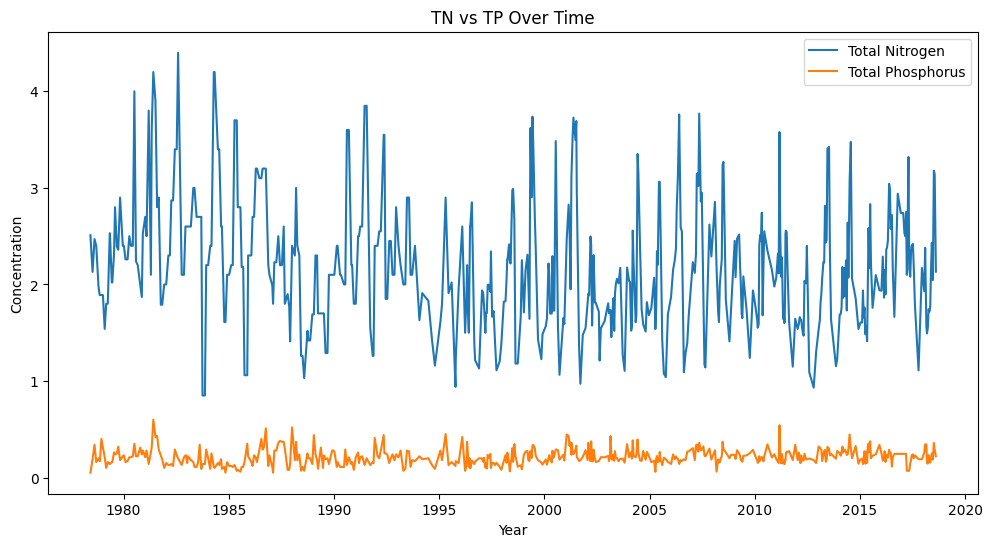

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df.index, df["TN"], label="Total Nitrogen")
plt.plot(df.index, df["TP"], label="Total Phosphorus")
plt.legend()
plt.title("TN vs TP Over Time")
plt.xlabel("Year")
plt.ylabel("Concentration")
plt.show()





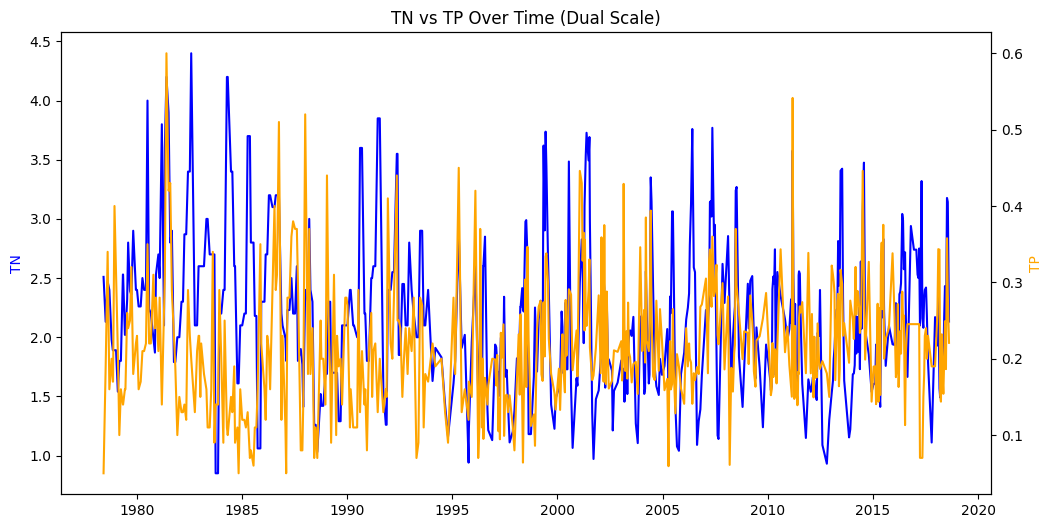

In [5]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df.index, df["TN"], color='blue', label="TN")
ax1.set_ylabel("TN", color="blue")

ax2 = ax1.twinx()
ax2.plot(df.index, df["TP"], color='orange', label="TP")
ax2.set_ylabel("TP", color="orange")

plt.title("TN vs TP Over Time (Dual Scale)")
plt.show()


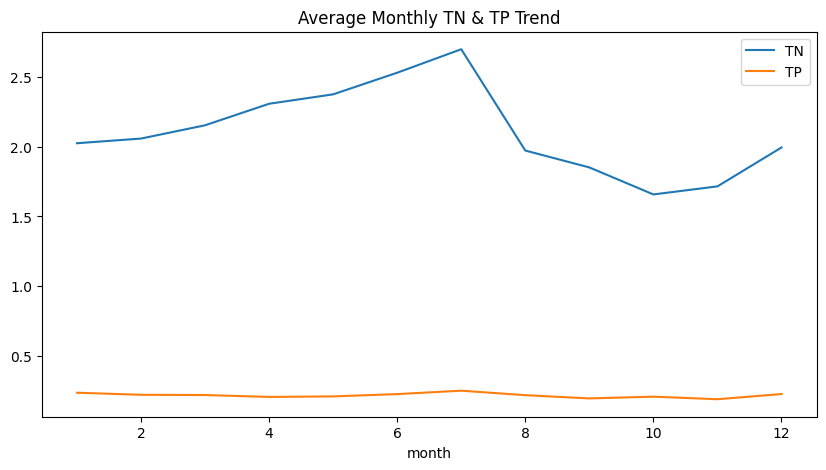

In [6]:
df["month"] = df.index.month
df_month = df.groupby("month").mean()

df_month[["TN","TP"]].plot(figsize=(10,5))
plt.title("Average Monthly TN & TP Trend")
plt.show()


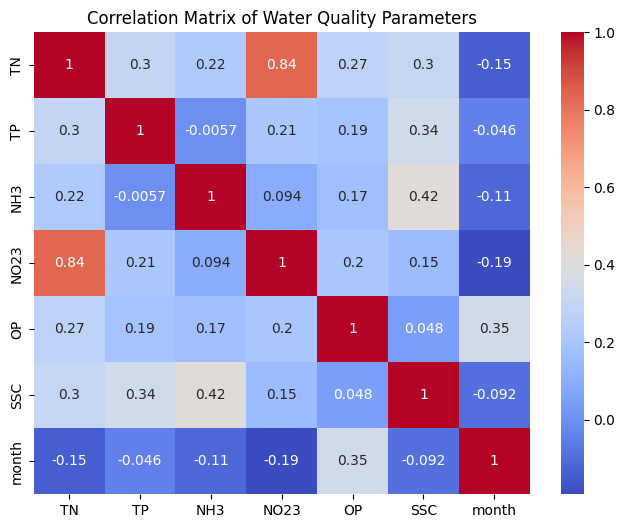

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Water Quality Parameters")
plt.show()



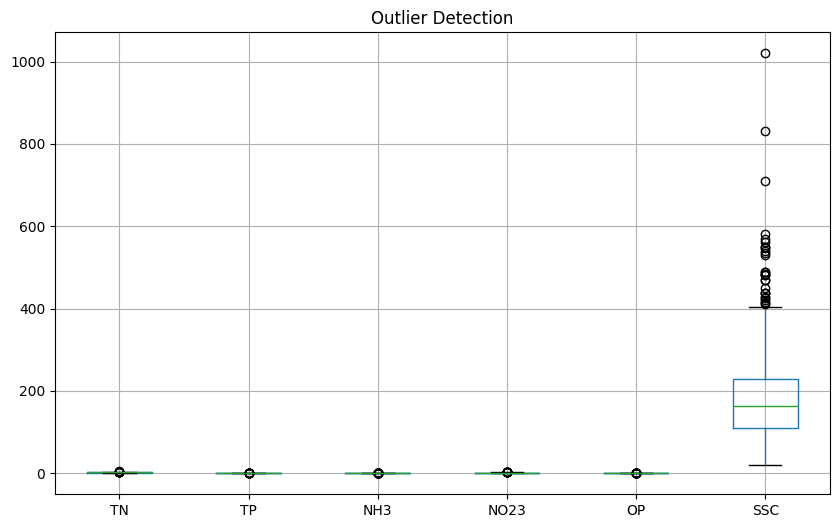

In [8]:
df.boxplot(column=["TN","TP","NH3","NO23","OP","SSC"], figsize=(10,6))
plt.title("Outlier Detection")
plt.show()


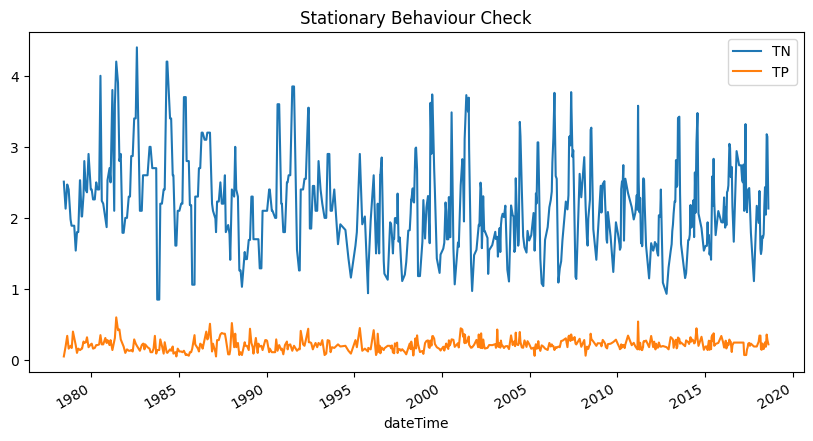

In [10]:
df[["TN","TP"]].plot(figsize=(10,5))
plt.title("Stationary Behaviour Check")
plt.show()
